In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
data = pd.read_csv('../data/csv_data/data/dataCOVID19_es.csv')

In [16]:
data['nuevos_casos'] = np.nan
for CCAA in data.CCAA.unique():
    casos_hoy  = data.loc[data.CCAA == CCAA,'casos'].values[1:]
    casos_ayer = data.loc[data.CCAA == CCAA,'casos'].values[:-1]
    data.loc[data.CCAA == CCAA,'nuevos_casos'] = [np.nan]+list(casos_hoy-casos_ayer)

In [17]:
poblacion_CCAA = pd.read_csv('../data/info_data/PoblaciónCCAA.csv')

In [18]:
data['casos_pob'] = np.nan
for CCAA in data.CCAA.unique():
    data.loc[data.CCAA==CCAA,'casos_pob'] = data.loc[data.CCAA==CCAA,'casos'] / poblacion_CCAA.loc[poblacion_CCAA.CCAA == CCAA,'Población'].values

# Casos

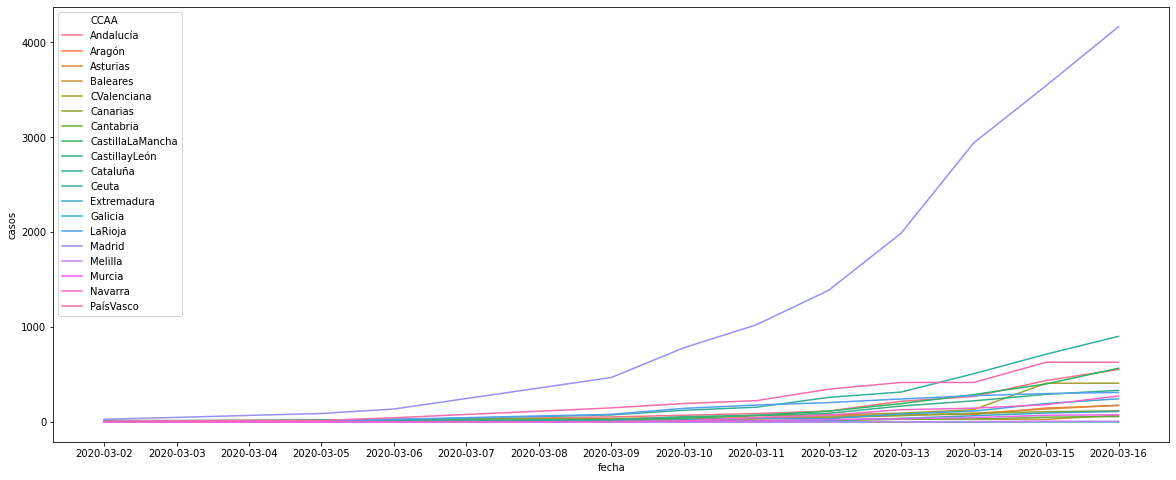

In [20]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="casos", hue='CCAA', data=data);

# Casos por CCAA / población

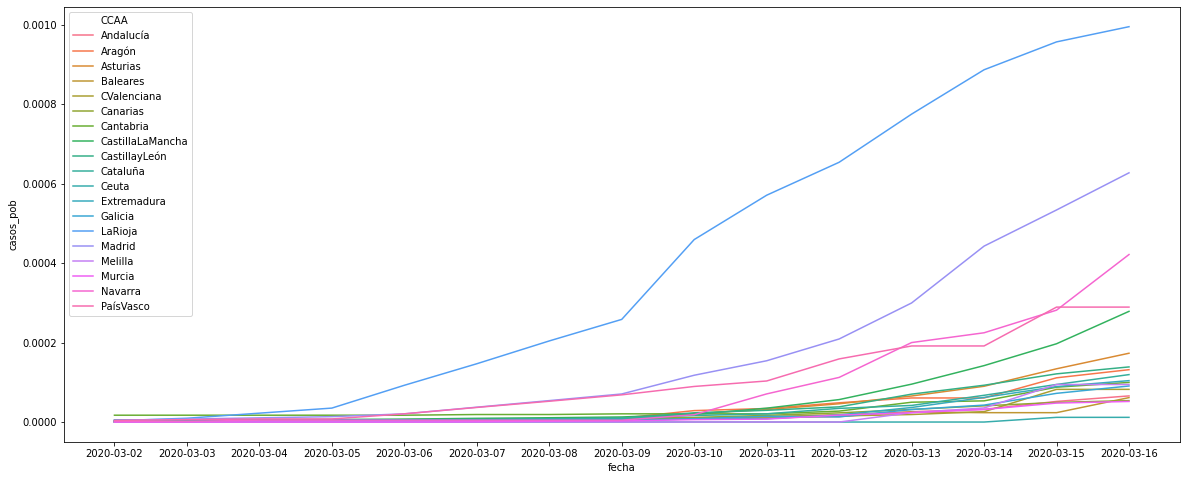

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="casos_pob", hue='CCAA', data=data);

# Nuevos casos

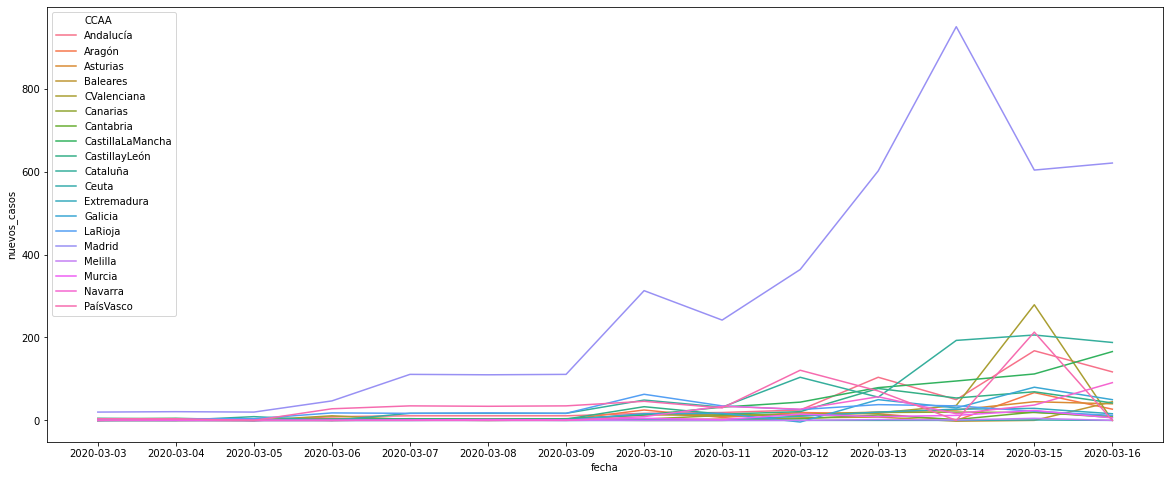

In [22]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="nuevos_casos", hue='CCAA', data=data);

# Incidencia Acumulada

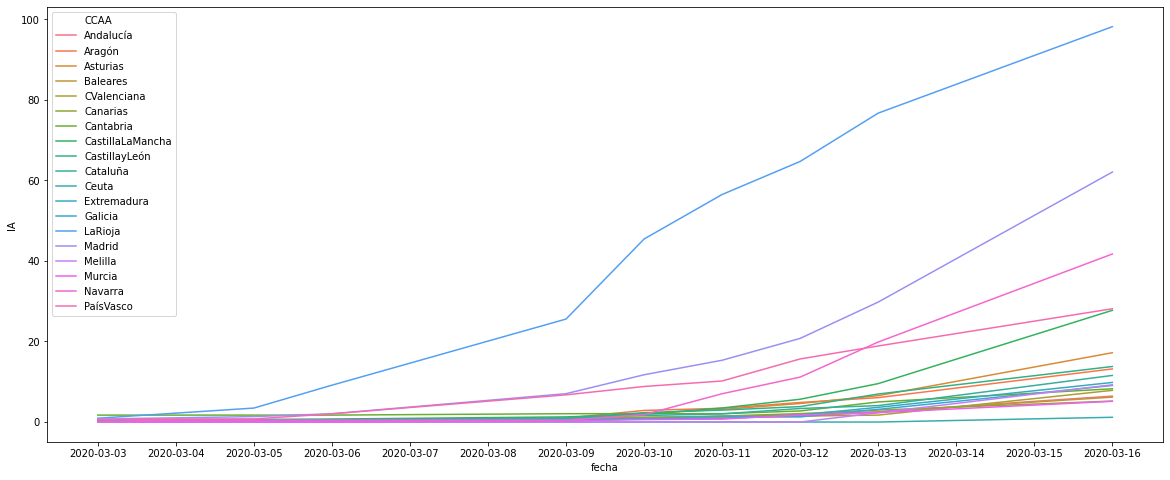

In [23]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="IA", hue='CCAA', data=data);

# UCI por CCAA

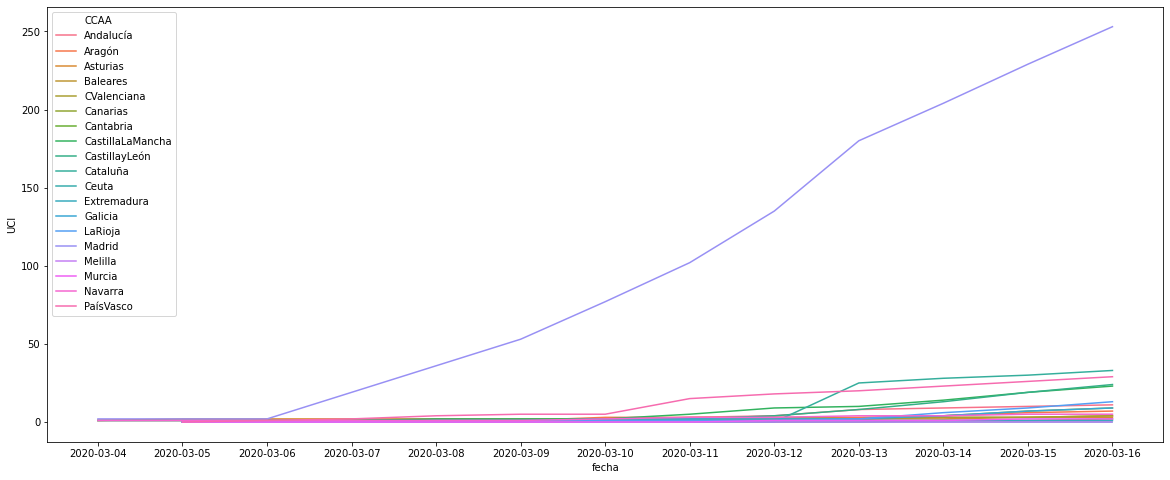

In [24]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="UCI", hue='CCAA', data=data);

# Muertes por CCAA

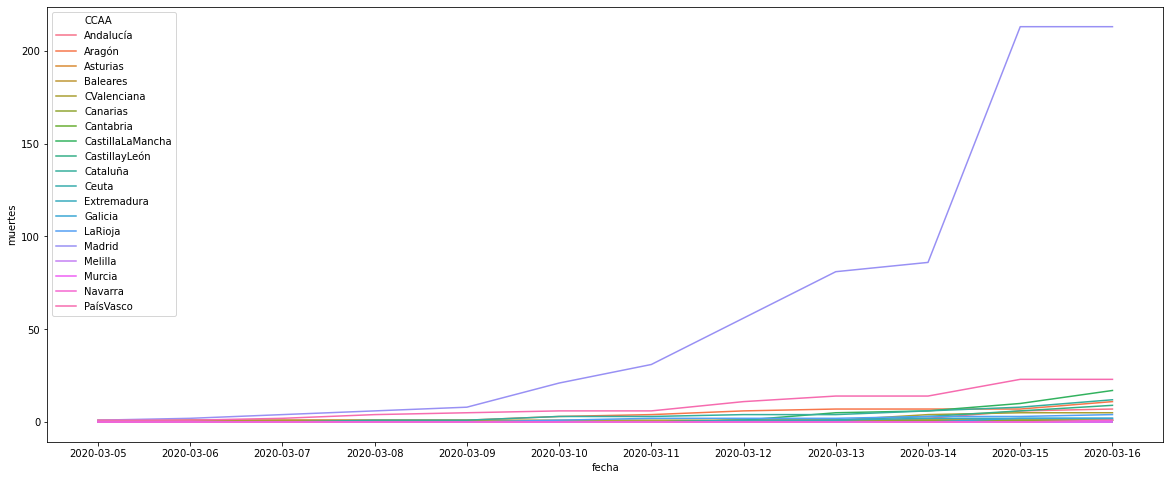

In [25]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="muertes", hue='CCAA', data=data);